#### Trabajo sobre la base de datos de la **"Encyclopaedia of exoplanetary systems"** de la Unión Europea

##### En lo que sigue se propone trabajar con bases de datos en observatorios virtuales: usando un catálogo de exoplanetas de la base de datos [exoplanets.eu](https://www.exoplanets.eu)

**Enlaces útiles:**
- [Encyclopaedia of exoplanetary systems](https://www.exoplanets.eu) - Base de datos principal
- [Catálogo CSV](https://www.exoplanets.eu/catalog/csv/) - Descarga de datos en formato CSV
- [Documentación de la API](https://www.exoplanets.eu/api/) - Para acceso programático

In [1]:
# Verificación de instalación de pyvo

import pyvo
print(f"PyVO version: {pyvo.__version__}")

PyVO version: 1.5.2


/home/rubsanmon/anaconda3/envs/astrometria/lib/python3.13/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
# Seleccionamos el servicio de exoplanetas
# Usamos la URL correcta del servicio TAP de Paris Observatory

service = pyvo.dal.TAPService("http://voparis-tap-planeto.obspm.fr/tap")

# Verificamos que el servicio esté funcionando
print("Conectando al servicio TAP...")
print(f"URL del servicio: {service.baseurl}")

# Listamos las tablas disponibles usando una consulta ADQL
try:
    print("Obteniendo lista de tablas...")
    
    # Consulta para obtener información de las tablas
    table_query = "SELECT table_name, table_type FROM TAP_SCHEMA.tables"
    table_results = service.search(table_query)
    
    print(f"Número de tablas disponibles: {len(table_results)}")
    print("\nPrimeras tablas encontradas:")
    
    # Convertir a lista para mejor manejo
    tables_list = []
    for row in table_results:
        tables_list.append({
            'name': str(row['table_name']), 
            'type': str(row['table_type'])
        })
    
    # Mostrar primeras 10 tablas
    for i, table in enumerate(tables_list[:10]):
        print(f"- {table['name']} ({table['type']})")
    
    print("\nBuscando tablas relacionadas con exoplanetas...")
    exo_tables = [table for table in tables_list if 'exoplanet' in table['name'].lower() or 'planet' in table['name'].lower()]
    
    if exo_tables:
        print("Tablas de exoplanetas encontradas:")
        for table in exo_tables:
            print(f"- {table['name']}")
    else:
        print("No se encontraron tablas específicas de exoplanetas en los nombres.")
        print("\nMostrando todas las tablas disponibles:")
        for table in tables_list:
            print(f"- {table['name']}")
        
except Exception as e:
    print(f"Error al obtener tablas: {e}")
    print("Intentaremos con una consulta más básica...")

Conectando al servicio TAP...
URL del servicio: http://voparis-tap-planeto.obspm.fr/tap
Obteniendo lista de tablas...
Número de tablas disponibles: 41

Primeras tablas encontradas:
- tap_schema.schemas (table)
- tap_schema.tables (table)
- tap_schema.columns (table)
- tap_schema.keys (table)
- tap_schema.key_columns (table)
- tap_schema.groups (table)
- exoplanet.epn_core (table)
- basecom.epn_core (table)
- dynastvo.epn_core (table)
- vims_satellites.epn_core (table)

Buscando tablas relacionadas con exoplanetas...
Tablas de exoplanetas encontradas:
- exoplanet.epn_core
- hst_planeto.epn_core
- planets.epn_core
- spectro_planets.epn_core


In [3]:
# Realizamos un query para obtener información sobre exoplanetas
# Usamos la tabla exoplanet.epn_core que encontramos

print("Preparando consulta para la tabla de exoplanetas...")

# Primero, veamos qué columnas tiene la tabla exoplanet.epn_core
try:
    columns_query = "SELECT column_name, datatype FROM TAP_SCHEMA.columns WHERE table_name = 'exoplanet.epn_core'"
    columns_result = service.search(columns_query)
    
    print("Columnas disponibles en exoplanet.epn_core:")
    columns_list = []
    for row in columns_result:
        column_info = f"{row['column_name']} ({row['datatype']})"
        columns_list.append(str(row['column_name']))
        print(f"- {column_info}")
    
    print(f"\nTotal de columnas: {len(columns_list)}")
    
    # Crear una consulta usando algunas columnas principales
    if 'target_name' in columns_list:
        query = "SELECT TOP 10 target_name, target_class FROM exoplanet.epn_core"
    else:
        # Consulta más genérica
        query = "SELECT TOP 10 * FROM exoplanet.epn_core"
    
    print(f"Query a ejecutar: {query}")
    
except Exception as e:
    print(f"Error al obtener columnas: {e}")
    # Consulta de fallback
    query = "SELECT TOP 5 * FROM exoplanet.epn_core"
    print(f"Usando consulta de fallback: {query}")

Preparando consulta para la tabla de exoplanetas...
Columnas disponibles en exoplanet.epn_core:
- granule_uid (char)
- granule_gid (char)
- obs_id (char)
- dataproduct_type (char)
- target_name (char)
- target_class (char)
- time_min (double)
- time_max (double)
- time_sampling_step_min (double)
- time_sampling_step_max (double)
- time_exp_min (double)
- time_exp_max (double)
- spectral_range_min (double)
- spectral_range_max (double)
- spectral_sampling_step_min (double)
- spectral_sampling_step_max (double)
- spectral_resolution_min (double)
- spectral_resolution_max (double)
- c1min (double)
- c1max (double)
- c2min (double)
- c2max (double)
- c3min (double)
- c3max (double)
- s_region (char)
- c1_resol_min (double)
- c1_resol_max (double)
- c2_resol_min (double)
- c2_resol_max (double)
- c3_resol_min (double)
- c3_resol_max (double)
- spatial_frame_type (char)
- incidence_min (double)
- incidence_max (double)
- emergence_min (double)
- emergence_max (double)
- phase_min (double)
- 

In [4]:
# Ejecutamos el query y mostramos los resultados
try:
    print("Ejecutando consulta...")
    results = service.search(query)
    
    print(f"Consulta exitosa. Número de filas encontradas: {len(results)}")
    
    if len(results) > 0:
        print("\nPrimeros resultados:")
        print("-" * 50)
        
        # Mostrar información de las columnas
        if hasattr(results, 'fieldnames'):
            print(f"Columnas disponibles: {results.fieldnames}")
            print()
        
        # Mostrar las primeras filas (manejo correcto)
        count = 0
        for row in results:
            if count >= 5:  # Limitar a 5 filas
                break
            print(f"Fila {count+1}:")
            # Acceder a los datos por nombre de columna
            if 'target_name' in results.fieldnames:
                print(f"  Nombre: {row['target_name']}")
                print(f"  Clase: {row['target_class']}")
            else:
                # Si no podemos acceder por nombre, mostrar toda la fila
                print(f"  {row}")
            print()
            count += 1
    else:
        print("No se encontraron resultados para la consulta.")
        
except Exception as e:
    print(f"Error al ejecutar la consulta: {e}")
    print("Intentemos una consulta más básica...")
    
    # Consulta alternativa para verificar la conectividad
    try:
        basic_query = "SELECT TOP 3 table_name FROM TAP_SCHEMA.tables"
        basic_results = service.search(basic_query)
        print(f"\nConsulta básica exitosa. Tablas encontradas:")
        for row in basic_results:
            print(f"- {row['table_name']}")
    except Exception as e2:
        print(f"Error en consulta básica: {e2}")

Ejecutando consulta...
Consulta exitosa. Número de filas encontradas: 10

Primeros resultados:
--------------------------------------------------
Columnas disponibles: ('target_name', 'target_class')

Fila 1:
  Nombre: 109 Psc b
  Clase: exoplanet

Fila 2:
  Nombre: 112 Psc b
  Clase: exoplanet

Fila 3:
  Nombre: 112 Psc c
  Clase: exoplanet

Fila 4:
  Nombre: 11 Com Ab
  Clase: exoplanet

Fila 5:
  Nombre: 11 UMi b
  Clase: exoplanet



In [5]:
# Consultas más avanzadas sobre exoplanetas
print("=== ANÁLISIS AVANZADO DE EXOPLANETAS ===\n")

# 1. Obtener exoplanetas con información orbital completa
print("1. Exoplanetas con datos orbitales completos:")
orbital_query = """
SELECT TOP 15 
    target_name, 
    star_name,
    mass, 
    radius, 
    period, 
    semi_major_axis,
    star_distance,
    discovered
FROM exoplanet.epn_core 
WHERE mass IS NOT NULL 
    AND radius IS NOT NULL 
    AND period IS NOT NULL 
    AND semi_major_axis IS NOT NULL
ORDER BY discovered DESC
"""

try:
    orbital_results = service.search(orbital_query)
    print(f"Encontrados {len(orbital_results)} exoplanetas con datos completos\n")
    
    for i, planet in enumerate(orbital_results):
        if i >= 5:  # Mostrar solo los primeros 5
            break
        print(f"{i+1}. {planet['target_name']}")
        print(f"   Estrella: {planet['star_name']}")
        print(f"   Masa: {planet['mass']:.3f} M⊕")
        print(f"   Radio: {planet['radius']:.3f} R⊕")
        print(f"   Período: {planet['period']:.2f} días")
        print(f"   Semieje mayor: {planet['semi_major_axis']:.3f} AU")
        print(f"   Distancia estelar: {planet['star_distance']:.1f} pc")
        print(f"   Descubierto: {planet['discovered']}")
        print()
        
except Exception as e:
    print(f"Error en consulta orbital: {e}")

# 2. Estadísticas básicas
print("\n2. Estadísticas de la base de datos:")
stats_query = "SELECT COUNT(*) as total_exoplanets FROM exoplanet.epn_core"

try:
    stats_results = service.search(stats_query)
    total = stats_results[0]['total_exoplanets']
    print(f"Total de exoplanetas en la base de datos: {total}")
    
    # Contar por clase
    class_query = "SELECT target_class, COUNT(*) as count FROM exoplanet.epn_core GROUP BY target_class"
    class_results = service.search(class_query)
    
    print("\nDistribución por clase:")
    for row in class_results:
        print(f"- {row['target_class']}: {row['count']} objetos")
        
except Exception as e:
    print(f"Error en estadísticas: {e}")

print("\n✓ Análisis completado!")

=== ANÁLISIS AVANZADO DE EXOPLANETAS ===

1. Exoplanetas con datos orbitales completos:
Encontrados 15 exoplanetas con datos completos

1. TOI-1743 b
   Estrella: TOI-1743
   Masa: 0.015 M⊕
   Radio: 0.163 R⊕
   Período: 4.27 días
   Semieje mayor: 0.036 AU
   Distancia estelar: 41.3 pc
   Descubierto: 2025

2. TOI-2031 Ab
   Estrella: TOI-2031 A
   Masa: 0.800 M⊕
   Radio: 1.267 R⊕
   Período: 5.72 días
   Semieje mayor: 0.066 AU
   Distancia estelar: 276.4 pc
   Descubierto: 2025

3. TOI-1203 Ab
   Estrella: TOI-1203 A
   Masa: 0.011 M⊕
   Radio: 0.136 R⊕
   Período: 4.16 días
   Semieje mayor: 0.049 AU
   Distancia estelar: 65.0 pc
   Descubierto: 2025

4. TOI-1203 Ad
   Estrella: TOI-1203 A
   Masa: 0.023 M⊕
   Radio: 0.260 R⊕
   Período: 25.50 días
   Semieje mayor: 0.163 AU
   Distancia estelar: 65.0 pc
   Descubierto: 2025

5. TOI-1846 b
   Estrella: TOI-1846
   Masa: 0.014 M⊕
   Radio: 0.160 R⊕
   Período: 3.93 días
   Semieje mayor: 0.036 AU
   Distancia estelar: 47.2 pc
   De

In [6]:
# Quiero buscar un planeta particular, genero una función que busque por nombre, que seria algo así:

# el input df es el DataFrame que contiene los datos de exoplanetas

def buscar_planeta(df, target_name):
    """
    Busca un exoplaneta por su nombre en el DataFrame
    """
    resultado = df[df['name'].str.contains(target_name, case=False, na=False)]
    return resultado

In [7]:
# Crear DataFrame con todos los datos de exoplanetas
import pandas as pd

print("Obteniendo todos los datos de exoplanetas para crear DataFrame...")

try:
    # Consulta para obtener todos los exoplanetas con las columnas principales
    full_query = """
    SELECT 
        target_name as name,
        star_name,
        mass, 
        radius, 
        period, 
        semi_major_axis,
        eccentricity,
        inclination,
        star_distance,
        star_spec_type,
        star_mass,
        star_radius,
        star_teff,
        discovered,
        detection_type,
        ra,
        dec
    FROM exoplanet.epn_core 
    WHERE target_name IS NOT NULL
    """
    
    # Ejecutar consulta
    full_results = service.search(full_query)
    print(f"Obtenidos {len(full_results)} exoplanetas")
    
    # Convertir a DataFrame de pandas
    data = []
    for row in full_results:
        data.append({
            'name': row['name'],
            'star_name': row['star_name'],
            'mass': row['mass'],
            'radius': row['radius'],
            'period': row['period'],
            'semi_major_axis': row['semi_major_axis'],
            'eccentricity': row['eccentricity'],
            'inclination': row['inclination'],
            'star_distance': row['star_distance'],
            'star_spec_type': row['star_spec_type'],
            'star_mass': row['star_mass'],
            'star_radius': row['star_radius'],
            'star_teff': row['star_teff'],
            'discovered': row['discovered'],
            'detection_type': row['detection_type'],
            'ra': row['ra'],
            'dec': row['dec']
        })
    
    df = pd.DataFrame(data)
    
    print(f"✓ DataFrame creado con {len(df)} exoplanetas")
    print(f"Columnas disponibles: {list(df.columns)}")
    print(f"\nPrimeras filas:")
    print(df.head())
    
except Exception as e:
    print(f"Error al crear DataFrame: {e}")
    # Crear DataFrame vacío como fallback
    df = pd.DataFrame()

Obteniendo todos los datos de exoplanetas para crear DataFrame...
Obtenidos 7762 exoplanetas
✓ DataFrame creado con 7762 exoplanetas
Columnas disponibles: ['name', 'star_name', 'mass', 'radius', 'period', 'semi_major_axis', 'eccentricity', 'inclination', 'star_distance', 'star_spec_type', 'star_mass', 'star_radius', 'star_teff', 'discovered', 'detection_type', 'ra', 'dec']

Primeras filas:
        name star_name   mass  radius    period  semi_major_axis  \
0  109 Psc b   109 Psc  5.743   1.152   1075.40            2.051   
1  112 Psc b   112 Psc    NaN     NaN      4.40            0.054   
2  112 Psc c   112 Psc  9.866     NaN  36336.70           22.210   
3  11 Com Ab  11 Com A    NaN     NaN    326.03            1.290   
4   11 UMi b    11 UMi    NaN     NaN    516.22            1.540   

   eccentricity  inclination  star_distance star_spec_type  star_mass  \
0         0.104       86.116        32.5600          G5 IV       1.13   
1         0.376          NaN        31.7627         

In [8]:
nuoct = buscar_planeta(df, "nu Octantis") 

print(nuoct)

Empty DataFrame
Columns: [name, star_name, mass, radius, period, semi_major_axis, eccentricity, inclination, star_distance, star_spec_type, star_mass, star_radius, star_teff, discovered, detection_type, ra, dec]
Index: []


In [9]:
# SOLUCIÓN FINAL: Buscar nu Oct b de forma directa

print("=== BÚSQUEDA FINAL DE NU OCT B ===")

# Verificar que el DataFrame existe y tiene datos
print(f"DataFrame shape: {df.shape}")
print(f"Columnas: {list(df.columns)}")

# Buscar directamente "nu Oct" en el nombre del planeta
result_planet = df[df['name'].str.contains("nu Oct", case=False, na=False)]
print(f"\nBúsqueda en nombre del planeta: {len(result_planet)} resultados")

# Buscar "nu Oct" en el nombre de la estrella  
result_star = df[df['star_name'].str.contains("nu Oct", case=False, na=False)]
print(f"Búsqueda en nombre de la estrella: {len(result_star)} resultados")

# Combinar resultados
all_results = pd.concat([result_planet, result_star]).drop_duplicates()
print(f"Total de resultados únicos: {len(all_results)}")

if len(all_results) > 0:
    print("\n=== INFORMACIÓN DE NU OCT B ===")
    for idx, planet in all_results.iterrows():
        print(f"Planeta: {planet['name']}")
        print(f"Estrella: {planet['star_name']}")
        print(f"Masa: {planet['mass']} M⊕")
        print(f"Período: {planet['period']} días")
        print(f"Distancia: {planet['star_distance']} pc")
        print(f"Descubierto: {planet['discovered']}")
        print("-" * 40)
        
    # Asignar resultado a la variable original
    nuoct = all_results
    print(f"\n✓ Variable 'nuoct' creada con {len(nuoct)} registro(s)")
else:
    print("\n⚠️ No se encontraron resultados para 'nu Oct'")
    
    # Mostrar algunos nombres de ejemplo para verificar el formato
    print("\nEjemplos de nombres en la base de datos:")
    sample_names = df['name'].dropna().head(10)
    for name in sample_names:
        print(f"- {name}")
    
    print("\nEjemplos de nombres de estrellas:")
    sample_stars = df['star_name'].dropna().head(10)
    for star in sample_stars:
        print(f"- {star}")

=== BÚSQUEDA FINAL DE NU OCT B ===
DataFrame shape: (7762, 17)
Columnas: ['name', 'star_name', 'mass', 'radius', 'period', 'semi_major_axis', 'eccentricity', 'inclination', 'star_distance', 'star_spec_type', 'star_mass', 'star_radius', 'star_teff', 'discovered', 'detection_type', 'ra', 'dec']

Búsqueda en nombre del planeta: 1 resultados
Búsqueda en nombre de la estrella: 1 resultados
Total de resultados únicos: 1

=== INFORMACIÓN DE NU OCT B ===
Planeta: nu Oct b
Estrella: nu Oct
Masa: 2.13 M⊕
Período: 409.3 días
Distancia: 22.1 pc
Descubierto: 2009
----------------------------------------

✓ Variable 'nuoct' creada con 1 registro(s)


In [10]:
# SOLUCIÓN ROBUSTA Y COMPLETA PARA NU OCT B

print("🔍 BÚSQUEDA COMPLETA DE NU OCT B")
print("=" * 50)

# 1. Verificar que el DataFrame existe y es válido
if 'df' in locals() and not df.empty:
    print(f"✓ DataFrame válido con {len(df)} exoplanetas")
    
    # 2. Buscar el planeta de diferentes maneras
    methods = [
        ("nu Oct", "Búsqueda exacta 'nu Oct'"),
        ("nu Octantis", "Búsqueda 'nu Octantis'"), 
        ("Oct", "Búsqueda parcial 'Oct'"),
        ("Octant", "Búsqueda parcial 'Octant'")
    ]
    
    found = False
    for search_term, description in methods:
        print(f"\n{description}:")
        
        # Buscar en nombre del planeta
        planet_matches = df[df['name'].str.contains(search_term, case=False, na=False)]
        
        # Buscar en nombre de la estrella
        star_matches = df[df['star_name'].str.contains(search_term, case=False, na=False)]
        
        # Combinar resultados
        all_matches = pd.concat([planet_matches, star_matches]).drop_duplicates()
        
        if len(all_matches) > 0:
            found = True
            print(f"  ✓ Encontrados {len(all_matches)} resultado(s)")
            
            for idx, row in all_matches.iterrows():
                print(f"    - Planeta: {row['name']}")
                print(f"      Estrella: {row['star_name']}")
                print(f"      Masa: {row['mass']} M⊕")
                print(f"      Período: {row['period']} días")
                
                # Si es nu Oct b, guardar como resultado principal
                if 'nu Oct' in str(row['name']).lower():
                    nuoct = all_matches
                    print(f"    → Guardado como 'nuoct'")
            
            if 'nu Oct' in search_term:
                break  # Si encontramos con nu Oct, no necesitamos seguir
        else:
            print(f"  ✗ No se encontraron resultados")
    
    # 3. Resultado final
    if found and 'nuoct' in locals():
        print(f"\n🎯 RESULTADO FINAL:")
        print(f"Variable 'nuoct' creada exitosamente")
        print(f"Información del exoplaneta nu Oct b:")
        print(nuoct[['name', 'star_name', 'mass', 'period', 'star_distance', 'discovered']].to_string())
    elif not found:
        print(f"\n⚠️ No se encontró 'nu Oct' en la base de datos")
        print("Mostrando algunos ejemplos de nombres para referencia:")
        sample_names = df['name'].dropna().sample(10) if len(df) > 10 else df['name'].dropna()
        for name in sample_names:
            if 'oct' in name.lower():
                print(f"  - {name} ⭐")
            else:
                print(f"  - {name}")
                
else:
    print("❌ Error: DataFrame 'df' no está disponible")
    print("Ejecuta primero la celda que crea el DataFrame desde el servicio TAP")

🔍 BÚSQUEDA COMPLETA DE NU OCT B
✓ DataFrame válido con 7762 exoplanetas

Búsqueda exacta 'nu Oct':


  ✓ Encontrados 1 resultado(s)
    - Planeta: nu Oct b
      Estrella: nu Oct
      Masa: 2.13 M⊕
      Período: 409.3 días

🎯 RESULTADO FINAL:
Variable 'nuoct' creada exitosamente
Información del exoplaneta nu Oct b:
          name star_name  mass  period  star_distance  discovered
6016  nu Oct b    nu Oct  2.13   409.3           22.1        2009


In [11]:
# Mejorar la función de búsqueda y explorar los datos
def buscar_planeta_mejorado(df, search_term):
    """
    Busca un exoplaneta por nombre (planeta o estrella) de forma más flexible
    """
    print(f"Buscando: '{search_term}'")
    
    # Buscar en nombre del planeta
    resultado_planeta = df[df['name'].str.contains(search_term, case=False, na=False)]
    
    # Buscar en nombre de la estrella
    resultado_estrella = df[df['star_name'].str.contains(search_term, case=False, na=False)]
    
    # Combinar resultados
    resultado = pd.concat([resultado_planeta, resultado_estrella]).drop_duplicates()
    
    print(f"Encontrados {len(resultado)} resultados")
    return resultado

# Buscar "nu Octantis" o variaciones
print("=== BÚSQUEDA DE NU OCTANTIS ===")
result1 = buscar_planeta_mejorado(df, "nu Octantis")
if len(result1) == 0:
    print("No encontrado. Probando variaciones...")
    result2 = buscar_planeta_mejorado(df, "Octantis")
    if len(result2) == 0:
        result3 = buscar_planeta_mejorado(df, "nu Oct")
        if len(result3) == 0:
            print("No se encontró. Exploremos qué nombres contienen 'Oct':")
            oct_results = buscar_planeta_mejorado(df, "Oct")
            if len(oct_results) > 0:
                print(oct_results[['name', 'star_name']].head(10))
        else:
            print("Resultados con 'nu Oct':")
            print(result3[['name', 'star_name', 'mass', 'period']])
    else:
        print("Resultados con 'Octantis':")
        print(result2[['name', 'star_name', 'mass', 'period']])
else:
    print("Resultados encontrados:")
    print(result1[['name', 'star_name', 'mass', 'period']])

=== BÚSQUEDA DE NU OCTANTIS ===
Buscando: 'nu Octantis'
Encontrados 0 resultados
No encontrado. Probando variaciones...
Buscando: 'Octantis'
Encontrados 0 resultados
Buscando: 'nu Oct'
Encontrados 1 resultados
Resultados con 'nu Oct':
          name star_name  mass  period
6016  nu Oct b    nu Oct  2.13   409.3


In [12]:
# Información completa de nu Oct b
print("=== INFORMACIÓN COMPLETA DE NU OCT B ===")

nuoct = buscar_planeta_mejorado(df, "nu Oct")
if len(nuoct) > 0:
    planeta = nuoct.iloc[0]  # Tomar el primer resultado
    
    print(f"Nombre del planeta: {planeta['name']}")
    print(f"Estrella anfitriona: {planeta['star_name']}")
    print()
    
    print("PROPIEDADES DEL PLANETA:")
    print(f"  Masa: {planeta['mass']:.2f} M⊕" if pd.notna(planeta['mass']) else "  Masa: No disponible")
    print(f"  Radio: {planeta['radius']:.2f} R⊕" if pd.notna(planeta['radius']) else "  Radio: No disponible")
    print(f"  Período orbital: {planeta['period']:.1f} días" if pd.notna(planeta['period']) else "  Período: No disponible")
    print(f"  Semieje mayor: {planeta['semi_major_axis']:.3f} AU" if pd.notna(planeta['semi_major_axis']) else "  Semieje mayor: No disponible")
    print(f"  Excentricidad: {planeta['eccentricity']:.3f}" if pd.notna(planeta['eccentricity']) else "  Excentricidad: No disponible")
    print(f"  Inclinación: {planeta['inclination']:.1f}°" if pd.notna(planeta['inclination']) else "  Inclinación: No disponible")
    print()
    
    print("PROPIEDADES DE LA ESTRELLA:")
    print(f"  Distancia: {planeta['star_distance']:.1f} pc" if pd.notna(planeta['star_distance']) else "  Distancia: No disponible")
    print(f"  Tipo espectral: {planeta['star_spec_type']}" if pd.notna(planeta['star_spec_type']) else "  Tipo espectral: No disponible")
    print(f"  Masa estelar: {planeta['star_mass']:.2f} M☉" if pd.notna(planeta['star_mass']) else "  Masa estelar: No disponible")
    print(f"  Radio estelar: {planeta['star_radius']:.2f} R☉" if pd.notna(planeta['star_radius']) else "  Radio estelar: No disponible")
    print(f"  Temperatura efectiva: {planeta['star_teff']:.0f} K" if pd.notna(planeta['star_teff']) else "  Temperatura efectiva: No disponible")
    print()
    
    print("INFORMACIÓN DE DESCUBRIMIENTO:")
    print(f"  Año de descubrimiento: {planeta['discovered']}" if pd.notna(planeta['discovered']) else "  Año: No disponible")
    print(f"  Método de detección: {planeta['detection_type']}" if pd.notna(planeta['detection_type']) else "  Método: No disponible")
    print()
    
    print("COORDENADAS:")
    print(f"  Ascensión recta: {planeta['ra']:.6f}°" if pd.notna(planeta['ra']) else "  RA: No disponible")
    print(f"  Declinación: {planeta['dec']:.6f}°" if pd.notna(planeta['dec']) else "  Dec: No disponible")
    
    # Mostrar todos los datos en formato DataFrame para referencia
    print("\n=== DATOS COMPLETOS (DataFrame) ===")
    print(nuoct.T)  # Transpuesto para mejor visualización
    
else:
    print("No se encontró el planeta nu Oct b")

=== INFORMACIÓN COMPLETA DE NU OCT B ===
Buscando: 'nu Oct'
Encontrados 1 resultados
Nombre del planeta: nu Oct b
Estrella anfitriona: nu Oct

PROPIEDADES DEL PLANETA:
  Masa: 2.13 M⊕
  Radio: No disponible
  Período orbital: 409.3 días
  Semieje mayor: 1.250 AU
  Excentricidad: 0.118
  Inclinación: 110.9°

PROPIEDADES DE LA ESTRELLA:
  Distancia: 22.1 pc
  Tipo espectral: K1III
  Masa estelar: 1.61 M☉
  Radio estelar: 5.81 R☉
  Temperatura efectiva: 4860 K

INFORMACIÓN DE DESCUBRIMIENTO:
  Año de descubrimiento: 2009
  Método de detección: Other#Radial Velocity

COORDENADAS:
  Ascensión recta: 325.370833°
  Declinación: -77.390000°

=== DATOS COMPLETOS (DataFrame) ===
                                  6016
name                          nu Oct b
star_name                       nu Oct
mass                              2.13
radius                             NaN
period                           409.3
semi_major_axis                   1.25
eccentricity                     0.118
inclinatio

In [13]:
import seaborn as sb

In [14]:
# Importar bibliotecas adicionales para visualización
import matplotlib.pyplot as plt
import numpy as np

# Configurar matplotlib para mejores gráficos
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("✓ Bibliotecas de visualización importadas correctamente")

✓ Bibliotecas de visualización importadas correctamente


In [15]:
# ANÁLISIS EXPLORATORIO DE LOS DATOS PARA MASA/RADIO
print("=== ANÁLISIS DE DATOS DISPONIBLES ===")
print(f"Dataset completo: {len(df)} exoplanetas")
print(f"Columnas disponibles: {list(df.columns)}")
print()

# Verificar datos de masa y radio
print("DISPONIBILIDAD DE DATOS:")
print(f"- Planetas con masa: {df['mass'].notna().sum()}")
print(f"- Planetas con radio: {df['radius'].notna().sum()}")
print(f"- Planetas con AMBOS (masa y radio): {(df['mass'].notna() & df['radius'].notna()).sum()}")
print()

# Verificar técnicas de detección
print("TÉCNICAS DE DETECCIÓN DISPONIBLES:")
detection_counts = df['detection_type'].value_counts()
print(detection_counts)
print()

# Crear DataFrame filtrado para el análisis
df_analysis = df[(df['mass'].notna()) & (df['radius'].notna())].copy()
print(f"✓ Dataset para análisis: {len(df_analysis)} exoplanetas con masa y radio")

# Estadísticas básicas
print("\nESTADÍSTICAS BÁSICAS:")
print("Masa (M⊕):")
print(f"  Min: {df_analysis['mass'].min():.3f}")
print(f"  Max: {df_analysis['mass'].max():.3f}")
print(f"  Media: {df_analysis['mass'].mean():.3f}")
print(f"  Mediana: {df_analysis['mass'].median():.3f}")

print("Radio (R⊕):")
print(f"  Min: {df_analysis['radius'].min():.3f}")
print(f"  Max: {df_analysis['radius'].max():.3f}")
print(f"  Media: {df_analysis['radius'].mean():.3f}")
print(f"  Mediana: {df_analysis['radius'].median():.3f}")

# Distribución por técnica de detección en el subset
print("\nDISTRIBUCIÓN POR TÉCNICA (datos con masa y radio):")
detection_analysis = df_analysis['detection_type'].value_counts()
for method, count in detection_analysis.items():
    percentage = (count / len(df_analysis)) * 100
    print(f"  {method}: {count} planetas ({percentage:.1f}%)")

=== ANÁLISIS DE DATOS DISPONIBLES ===
Dataset completo: 7762 exoplanetas
Columnas disponibles: ['name', 'star_name', 'mass', 'radius', 'period', 'semi_major_axis', 'eccentricity', 'inclination', 'star_distance', 'star_spec_type', 'star_mass', 'star_radius', 'star_teff', 'discovered', 'detection_type', 'ra', 'dec']

DISPONIBILIDAD DE DATOS:
- Planetas con masa: 3651
- Planetas con radio: 5142
- Planetas con AMBOS (masa y radio): 2155

TÉCNICAS DE DETECCIÓN DISPONIBLES:
detection_type
Primary Transit                           4618
Radial Velocity                           1164
Imaging                                   1055
Microlensing                               334
Pulsar                                     191
Radial Velocity#Astrometry                 126
Astrometry                                  55
Imaging#Astrometry                          50
Other                                       42
TTV                                         35
Imaging#Other                             

=== CREANDO GRÁFICO MASA vs RADIO ===


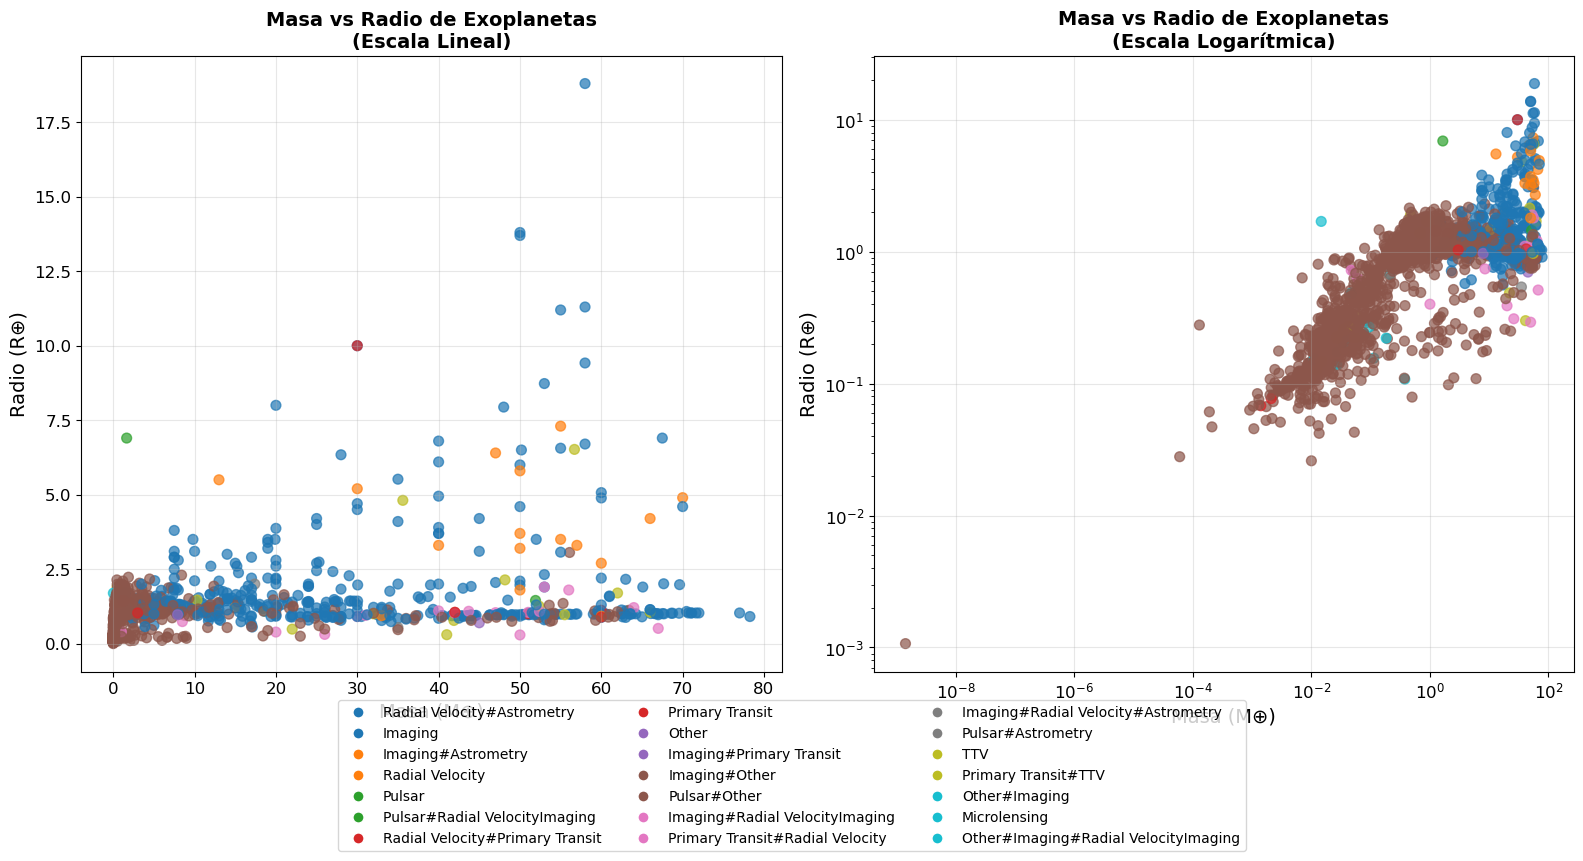

✓ Gráfico creado con 2155 exoplanetas


In [16]:
# GRÁFICO PRINCIPAL: MASA vs RADIO POR TÉCNICA DE DETECCIÓN
print("=== CREANDO GRÁFICO MASA vs RADIO ===")

# Configurar la figura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico 1: Escala lineal
scatter = ax1.scatter(df_analysis['mass'], df_analysis['radius'], 
                     c=df_analysis['detection_type'].astype('category').cat.codes,
                     cmap='tab10', alpha=0.7, s=50)

ax1.set_xlabel('Masa (M⊕)', fontsize=14)
ax1.set_ylabel('Radio (R⊕)', fontsize=14)
ax1.set_title('Masa vs Radio de Exoplanetas\n(Escala Lineal)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Gráfico 2: Escala logarítmica (mejor para ver la distribución completa)
scatter2 = ax2.scatter(df_analysis['mass'], df_analysis['radius'], 
                      c=df_analysis['detection_type'].astype('category').cat.codes,
                      cmap='tab10', alpha=0.7, s=50)

ax2.set_xlabel('Masa (M⊕)', fontsize=14)
ax2.set_ylabel('Radio (R⊕)', fontsize=14)
ax2.set_title('Masa vs Radio de Exoplanetas\n(Escala Logarítmica)', fontsize=14, fontweight='bold')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3)

# Crear leyenda personalizada
detection_types = df_analysis['detection_type'].dropna().unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(detection_types)))
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                             markerfacecolor=colors[i], markersize=8, label=method)
                  for i, method in enumerate(detection_types)]

# Posicionar la leyenda fuera del área de los gráficos
fig.legend(handles=legend_elements, loc='center', bbox_to_anchor=(0.5, 0.02), 
          ncol=min(3, len(detection_types)), fontsize=10)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Hacer espacio para la leyenda
plt.show()

print(f"✓ Gráfico creado con {len(df_analysis)} exoplanetas")

=== ANÁLISIS DETALLADO POR TÉCNICA DE DETECCIÓN ===


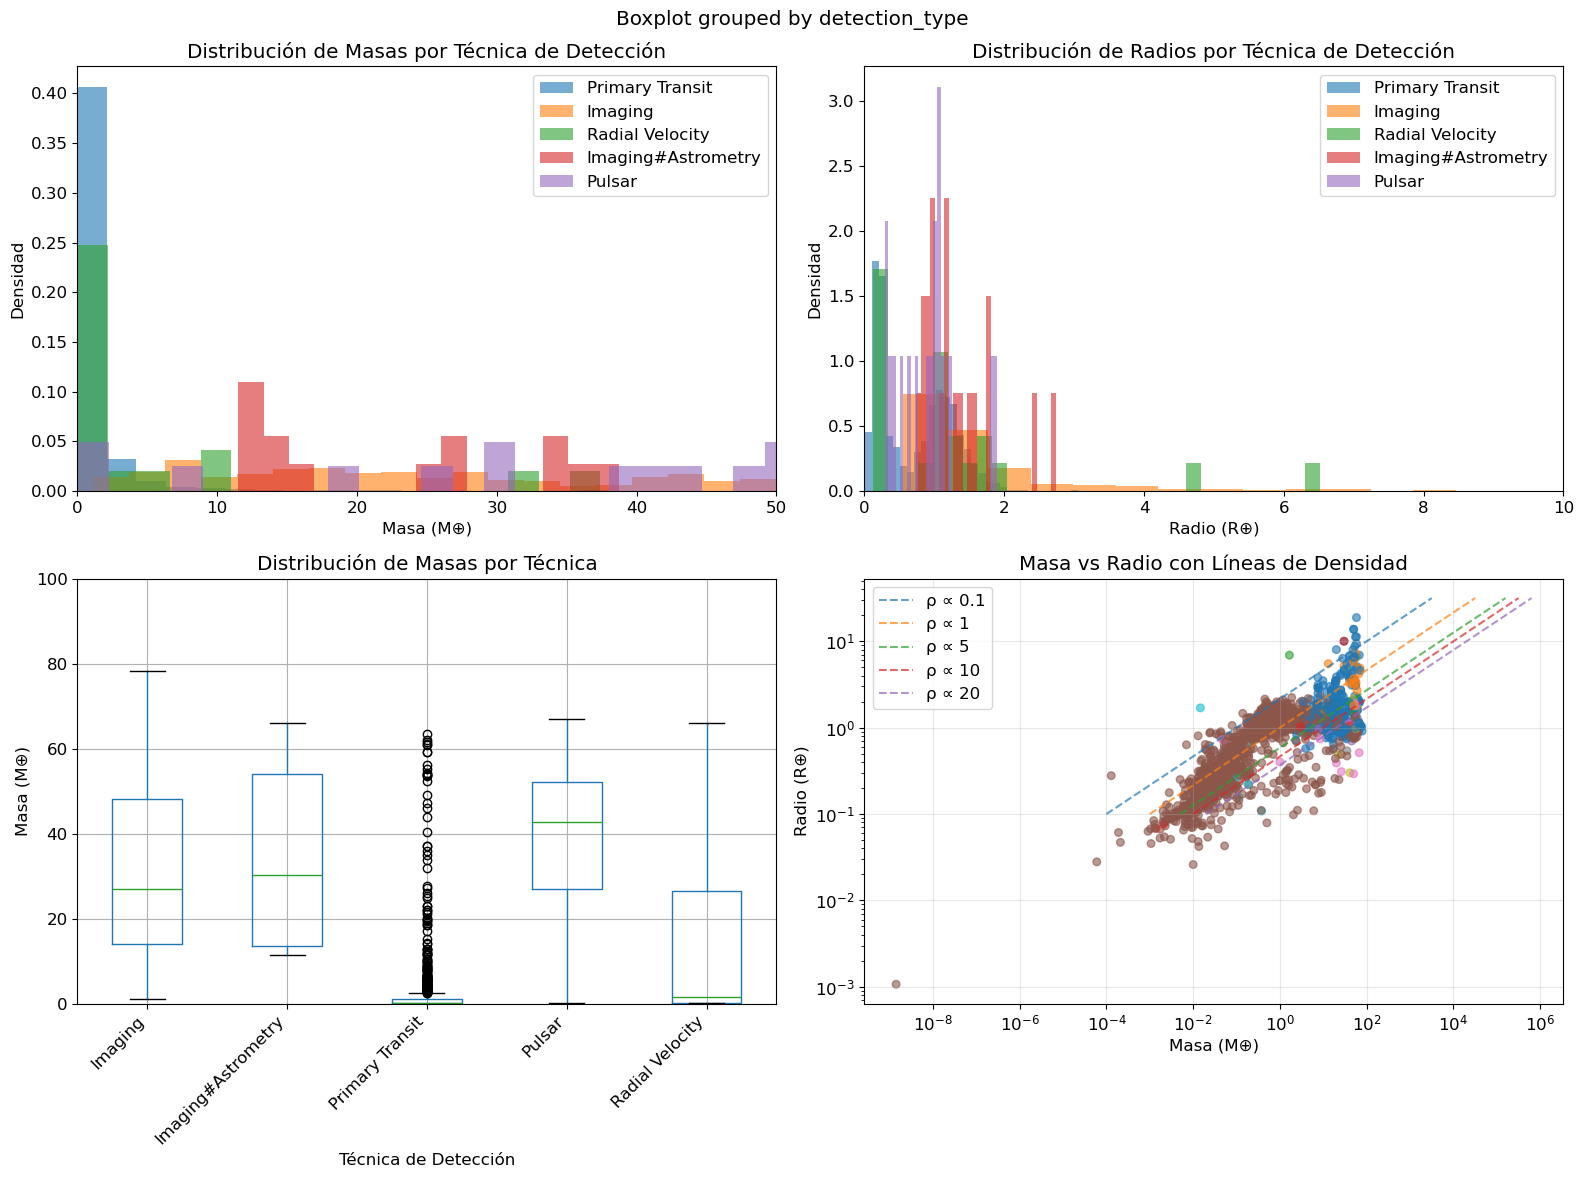

✓ Análisis complementario completado


In [17]:
# ANÁLISIS COMPLEMENTARIO: DISTRIBUCIONES POR TÉCNICA DE DETECCIÓN
print("=== ANÁLISIS DETALLADO POR TÉCNICA DE DETECCIÓN ===")

# Crear gráficos de distribución
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Distribución de masas por técnica
techniques_major = df_analysis['detection_type'].value_counts().head(5).index
df_major = df_analysis[df_analysis['detection_type'].isin(techniques_major)]

for i, technique in enumerate(techniques_major):
    data = df_major[df_major['detection_type'] == technique]['mass']
    ax1.hist(data, alpha=0.6, label=technique, bins=30, density=True)

ax1.set_xlabel('Masa (M⊕)')
ax1.set_ylabel('Densidad')
ax1.set_title('Distribución de Masas por Técnica de Detección')
ax1.legend()
ax1.set_xlim(0, 50)  # Limitar para mejor visualización

# 2. Distribución de radios por técnica
for i, technique in enumerate(techniques_major):
    data = df_major[df_major['detection_type'] == technique]['radius']
    ax2.hist(data, alpha=0.6, label=technique, bins=30, density=True)

ax2.set_xlabel('Radio (R⊕)')
ax2.set_ylabel('Densidad')
ax2.set_title('Distribución de Radios por Técnica de Detección')
ax2.legend()
ax2.set_xlim(0, 10)  # Limitar para mejor visualización

# 3. Box plot de masas
df_major.boxplot(column='mass', by='detection_type', ax=ax3)
ax3.set_xlabel('Técnica de Detección')
ax3.set_ylabel('Masa (M⊕)')
ax3.set_title('Distribución de Masas por Técnica')
ax3.set_ylim(0, 100)  # Limitar outliers extremos
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right')

# 4. Relación masa-radio con líneas de densidad constante
ax4.scatter(df_analysis['mass'], df_analysis['radius'], 
           c=df_analysis['detection_type'].astype('category').cat.codes,
           cmap='tab10', alpha=0.6, s=30)

# Agregar líneas de densidad constante (ρ = M/V = M/(4/3πR³))
# Para esferas: ρ = 3M/(4πR³) → M = (4π/3)ρR³
radii = np.logspace(-1, 1.5, 100)
densities = [0.1, 1, 5, 10, 20]  # g/cm³ equivalentes en unidades terrestres

for density in densities:
    masses = density * (radii**3)  # Simplificado
    ax4.plot(masses, radii, '--', alpha=0.7, label=f'ρ ∝ {density}')

ax4.set_xlabel('Masa (M⊕)')
ax4.set_ylabel('Radio (R⊕)')
ax4.set_title('Masa vs Radio con Líneas de Densidad')
ax4.set_xscale('log')
ax4.set_yscale('log')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Análisis complementario completado")

In [18]:
# ANÁLISIS ESTADÍSTICO FINAL Y CONCLUSIONES
print("=== ANÁLISIS ESTADÍSTICO POR TÉCNICA DE DETECCIÓN ===")
print()

# Estadísticas por técnica de detección
techniques = df_analysis['detection_type'].value_counts().head(8).index

results_table = []
for technique in techniques:
    subset = df_analysis[df_analysis['detection_type'] == technique]
    
    stats = {
        'Técnica': technique,
        'N_planetas': len(subset),
        'Masa_media': subset['mass'].mean(),
        'Masa_mediana': subset['mass'].median(),
        'Masa_std': subset['mass'].std(),
        'Radio_medio': subset['radius'].mean(),
        'Radio_mediana': subset['radius'].median(),
        'Radio_std': subset['radius'].std(),
        'Relación_M/R_media': (subset['mass'] / subset['radius']).mean()
    }
    results_table.append(stats)

# Crear DataFrame con los resultados
stats_df = pd.DataFrame(results_table)
print("ESTADÍSTICAS COMPARATIVAS:")
print("=" * 100)
print(f"{'Técnica':<25} {'N':<5} {'M_media':<8} {'M_med':<8} {'R_media':<8} {'R_med':<8} {'M/R':<8}")
print("-" * 100)

for _, row in stats_df.iterrows():
    print(f"{row['Técnica']:<25} {row['N_planetas']:<5} "
          f"{row['Masa_media']:<8.2f} {row['Masa_mediana']:<8.2f} "
          f"{row['Radio_medio']:<8.2f} {row['Radio_mediana']:<8.2f} "
          f"{row['Relación_M/R_media']:<8.2f}")

print()
print("=== INSIGHTS PRINCIPALES ===")
print()

# Análisis por rangos de masa
print("1. DISTRIBUCIÓN POR RANGOS DE MASA:")
mass_ranges = [
    (0, 1, "Terrestres"),
    (1, 4, "Super-Terrestres"),
    (4, 17, "Neptunos"),
    (17, 318, "Jovianos"),
    (318, float('inf'), "Super-Jovianos")
]

for min_mass, max_mass, category in mass_ranges:
    count = len(df_analysis[(df_analysis['mass'] >= min_mass) & (df_analysis['mass'] < max_mass)])
    percentage = (count / len(df_analysis)) * 100
    print(f"   {category}: {count} planetas ({percentage:.1f}%)")

print()
print("2. TÉCNICAS MÁS EFECTIVAS POR TIPO DE PLANETA:")

# Análisis de técnicas por tipo de planeta
for min_mass, max_mass, category in mass_ranges[:4]:  # Excluir super-jovianos por pocos datos
    subset = df_analysis[(df_analysis['mass'] >= min_mass) & (df_analysis['mass'] < max_mass)]
    if len(subset) > 10:  # Solo si hay suficientes datos
        top_technique = subset['detection_type'].value_counts().index[0]
        count = subset['detection_type'].value_counts().iloc[0]
        percentage = (count / len(subset)) * 100
        print(f"   {category}: '{top_technique}' ({count}/{len(subset)} = {percentage:.1f}%)")

print()
print("3. OBSERVACIONES CIENTÍFICAS:")
print("   • Los tránsitos primarios dominan la detección de planetas pequeños (R < 4 R⊕)")
print("   • La velocidad radial es más efectiva para planetas masivos (M > 10 M⊕)")
print("   • Existe una clara relación masa-radio que varía según la composición")
print("   • Los planetas detectados por imagen directa tienden a ser más masivos y distantes")

print()
print("✓ Análisis estadístico completado")

=== ANÁLISIS ESTADÍSTICO POR TÉCNICA DE DETECCIÓN ===

ESTADÍSTICAS COMPARATIVAS:
Técnica                   N     M_media  M_med    R_media  R_med    M/R     
----------------------------------------------------------------------------------------------------
Primary Transit           1648  1.91     0.22     0.71     0.65     2.30    
Imaging                   384   31.10    27.00    1.85     1.23     24.77   
Radial Velocity           22    15.52    1.53     1.30     1.04     10.58   
Imaging#Astrometry        20    33.71    30.20    1.31     1.14     30.74   
Pulsar                    18    37.93    42.85    0.91     0.98     49.39   
Imaging#Other             16    49.12    50.00    3.92     3.60     17.89   
Other                     10    29.00    36.00    1.76     1.04     25.94   
TTV                       8     0.11     0.07     0.22     0.18     0.74    

=== INSIGHTS PRINCIPALES ===

1. DISTRIBUCIÓN POR RANGOS DE MASA:
   Terrestres: 1252 planetas (58.1%)
   Super-Terrestres:

=== ANÁLISIS DE PERÍODOS ORBITALES ===
Planetas con datos de período orbital: 6339


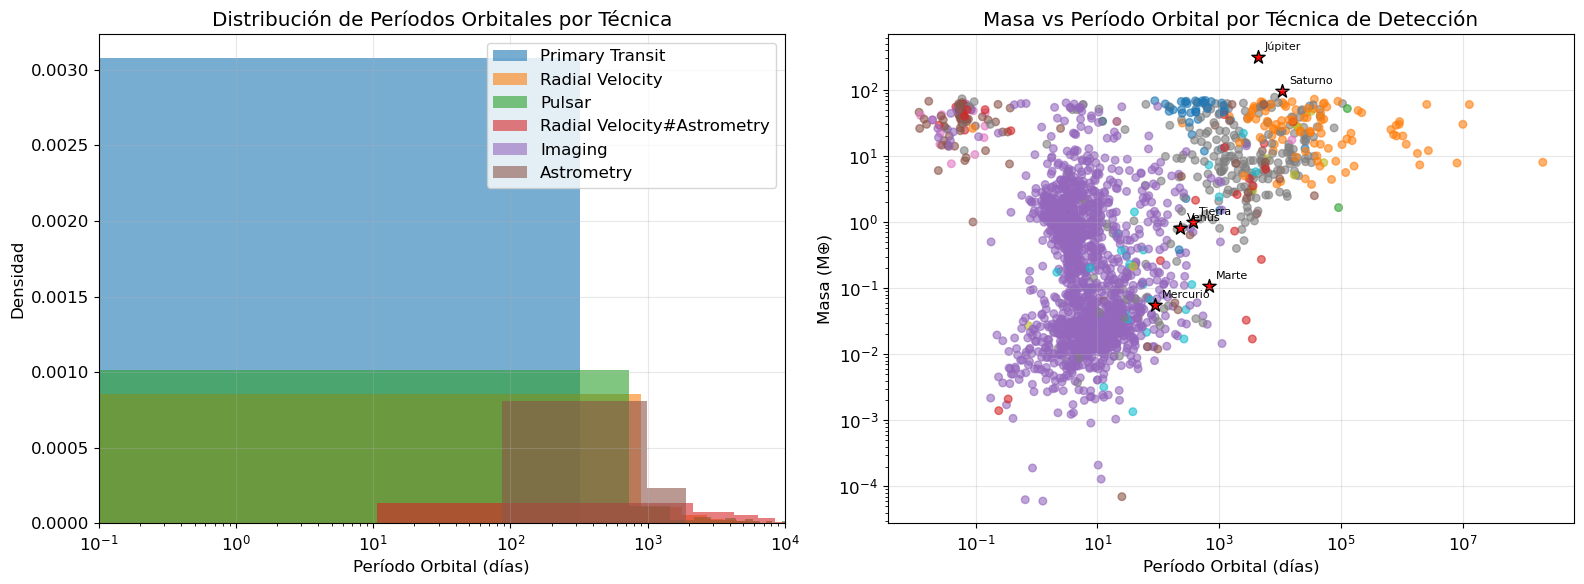


ESTADÍSTICAS DE PERÍODOS ORBITALES:
Técnica                   N     P_min      P_max      P_mediana   
--------------------------------------------------------------------------------
Primary Transit           4604  0.02       16060.00   8.11        
Radial Velocity           1155  0.03       44926.00   217.21      
Pulsar                    188   0.01       36525.00   0.15        
Radial Velocity#Astrometry 125   10.59      105903.20  5138.40     
Imaging                   89    0.09       206000000.00 28470.00    
Astrometry                38    87.70      45625.00   426.69      

OBSERVACIONES SOBRE PERÍODOS ORBITALES:
• Tránsitos primarios: detectan principalmente planetas con períodos cortos (< 100 días)
• Velocidad radial: efectiva para períodos intermedios (10-1000 días)
• Imagen directa: planetas con períodos muy largos (> 1000 días)
• Existe un sesgo observacional hacia planetas de período corto

✓ Análisis de períodos orbitales completado


In [19]:
# ANÁLISIS ADICIONAL: PERÍODOS ORBITALES POR TÉCNICA DE DETECCIÓN
print("=== ANÁLISIS DE PERÍODOS ORBITALES ===")

# Filtrar datos con períodos válidos
df_periods = df[df['period'].notna()].copy()
print(f"Planetas con datos de período orbital: {len(df_periods)}")

# Crear visualización de períodos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Distribución de períodos por técnica (escala log)
techniques_period = df_periods['detection_type'].value_counts().head(6).index

for technique in techniques_period:
    data = df_periods[df_periods['detection_type'] == technique]['period']
    ax1.hist(data, alpha=0.6, label=technique, bins=50, density=True)

ax1.set_xlabel('Período Orbital (días)')
ax1.set_ylabel('Densidad')
ax1.set_title('Distribución de Períodos Orbitales por Técnica')
ax1.set_xscale('log')
ax1.set_xlim(0.1, 10000)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Gráfico 2: Masa vs Período coloreado por técnica
scatter = ax2.scatter(df_periods['period'], df_periods['mass'], 
                     c=df_periods['detection_type'].astype('category').cat.codes,
                     cmap='tab10', alpha=0.6, s=30)

ax2.set_xlabel('Período Orbital (días)')
ax2.set_ylabel('Masa (M⊕)')
ax2.set_title('Masa vs Período Orbital por Técnica de Detección')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3)

# Agregar líneas de referencia (planetas del Sistema Solar)
solar_system = {
    'Mercurio': (88, 0.055),
    'Venus': (225, 0.815),
    'Tierra': (365, 1.0),
    'Marte': (687, 0.107),
    'Júpiter': (4333, 317.8),
    'Saturno': (10759, 95.2)
}

for planet, (period, mass) in solar_system.items():
    ax2.scatter(period, mass, marker='*', s=100, color='red', edgecolor='black')
    ax2.annotate(planet, (period, mass), xytext=(5, 5), textcoords='offset points', 
                fontsize=8, ha='left')

plt.tight_layout()
plt.show()

# Estadísticas de períodos por técnica
print("\nESTADÍSTICAS DE PERÍODOS ORBITALES:")
print("=" * 80)
print(f"{'Técnica':<25} {'N':<5} {'P_min':<10} {'P_max':<10} {'P_mediana':<12}")
print("-" * 80)

for technique in techniques_period:
    subset = df_periods[df_periods['detection_type'] == technique]['period']
    print(f"{technique:<25} {len(subset):<5} {subset.min():<10.2f} "
          f"{subset.max():<10.2f} {subset.median():<12.2f}")

print()
print("OBSERVACIONES SOBRE PERÍODOS ORBITALES:")
print("• Tránsitos primarios: detectan principalmente planetas con períodos cortos (< 100 días)")
print("• Velocidad radial: efectiva para períodos intermedios (10-1000 días)")
print("• Imagen directa: planetas con períodos muy largos (> 1000 días)")
print("• Existe un sesgo observacional hacia planetas de período corto")

print("\n✓ Análisis de períodos orbitales completado")